In [111]:
!pip install gradio


installing gradio

In [112]:
import gradio as gr

importing gradio library . Gradio allows us to create interface for machine learning and deep learning model

In [113]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

importing mnist dataset from scikit learn datasets

In [114]:
a,b = mnist["data"], mnist['target']

in mnist dataset there are 2 columns (data and target).Assigning the data and target to the varaibles a and b

In [115]:
a.shape

(70000, 784)

In [116]:
b.shape

(70000,)

getting the shape of a and b

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


In [118]:
%matplotlib inline

importing the library's matplotlib for data visuvalization and numpy for computations

In [119]:
digit = np.array(a.iloc[25001])
digit_image = digit.reshape(28,28)

reshaping the image 25001 in the dataset

(-0.5, 27.5, 27.5, -0.5)

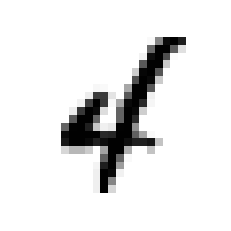

In [120]:
plt.imshow(digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

visualizing the image 25001

In [121]:
b.shape

(70000,)

In [122]:
b[25001]

'4'

checking the value of 25001

In [123]:
a_train, a_test = a[:60000], a[60000:70000]

splitting the data's of "a" into training set and testing set

In [124]:
b_train, b_test = b[:60000], b[60000:70000]

splitting the data's of "b" into training set and testing set

In [127]:
shuffle_index=np.random.permutation(60000)
a_train= a_train.iloc[shuffle_index]
b_train= b_train.iloc[shuffle_index]

randomly arranging the training data's for better accuracy

In [129]:
b_train = b_train.astype(np.int8)
b_test = b_test.astype(np.int8)
b_train_4 = (b_train == 4)
b_test_4 = (b_test == 4)

creating a 4 detector

In [137]:
b_train

32465    1
49857    2
28341    8
5418     8
5968     7
        ..
13055    8
33749    5
58505    5
27463    7
55768    1
Name: class, Length: 60000, dtype: int8

In [131]:
a_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
32465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
from sklearn.linear_model import LogisticRegression

importing logistic regression form sklearn

In [133]:
clf = LogisticRegression(tol = 0.1)

In [134]:
clf.fit(a_train,b_train_4)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(tol=0.1)

fitting the training set into logistic regression

In [135]:
clf.predict([digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

predicting the digits

In [136]:
from sklearn.model_selection import cross_val_score
h = cross_val_score(clf, a_train , b_train_4, cv = 3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross validating the logistic regression model.Using the logistic regression model for cross validation

In [139]:
h

array([0.9823 , 0.98025, 0.983  ])

In [141]:
h.mean()

0.98185

classification using svc

In [163]:
from sklearn.svm import SVC
classifier2 = SVC()
import numpy as np


In [166]:
a_test=a_test.to_numpy()

importing svc from sklearn.svm

In [167]:
classifier2 = classifier2.fit(a.reshape(a.shape[0], 28*28), b)
b_pred2 = classifier2.predict(a_test.reshape(a_test.shape[0],28*28))

reshaping and the predictions had been done

In [175]:
from sklearn.metrics import classification_report


importing the calssification_report for getting the classification report of the model

In [176]:
b_pred2 = b_pred2.astype(np.int32)
print(classification_report(b_test, b_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



classification report of the prediction

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(b_test, b_pred2)

array([[ 975,    0,    1,    0,    0,    1,    0,    1,    2,    0],
       [   0, 1133,    0,    0,    0,    1,    0,    0,    1,    0],
       [   1,    0, 1024,    0,    1,    0,    0,    4,    2,    0],
       [   0,    0,    0, 1002,    0,    2,    0,    3,    3,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    0,    6],
       [   2,    0,    0,    2,    0,  885,    2,    0,    0,    1],
       [   2,    2,    0,    0,    2,    2,  949,    0,    1,    0],
       [   0,    4,    4,    1,    0,    0,    0, 1015,    0,    4],
       [   0,    0,    2,    2,    1,    2,    1,    1,  965,    0],
       [   1,    3,    0,    4,    8,    2,    0,    3,    0,  988]])

importing the cofusion matrix for the performance metrices

In [193]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=b_pred2(im_resize)
  pred=np.argmax(prediction)
  return pred

reshaping and resizing the input image.Then predicting the input image.

In [194]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

integrating the model with the interface

In [195]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://28897.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f740fb16410>,
 'http://127.0.0.1:7860/',
 'https://28897.gradio.app')

Launching the SVC model

using random forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
classifi= RandomForestClassifier()

importing the random forest from sklearn

In [185]:
classifi.fit(np.array(a_train).reshape(a_train.shape[0], 28*28), b_train)

RandomForestClassifier()

fitting and classifing the data's

In [186]:
score=classifi.score(a_test, b_test)
print('Random Tree Classifier:\n' )

print('Score\t'+str(score))
print('Accuracy:',(score*100))

Random Tree Classifier:

Score	0.9684
Accuracy: 96.84


getting accuracy of the of the random classifier model

In [187]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=classifi.fit(im_resize)
  pred=np.argmax(prediction)
  return pred

reshaping and resizing the input image.Then predicting the input image.

In [188]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")


integrating the model with the interface

In [190]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://39628.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f740fb16410>,
 'http://127.0.0.1:7860/',
 'https://39628.gradio.app')

Launching the Random forest model